# PROJET A - MORPION

*GAND Valentin - PICOT Benoît - TARCY Allan*

## Détail du programme sur les exemples fournis

### Chargement des librairies et des images

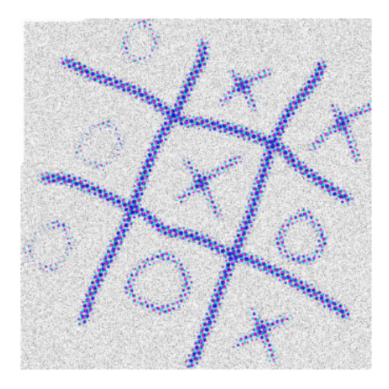

In [9]:
import cv2
import matplotlib.pyplot as plt
import utils as u
import symbol_detection as sd
import importlib
importlib.reload(sd)
importlib.reload(u)

imd = u.read_and_resize(800, "img/imd.png")

plt.figure()
plt.axis("off")
u.show(imd)


### Érosion

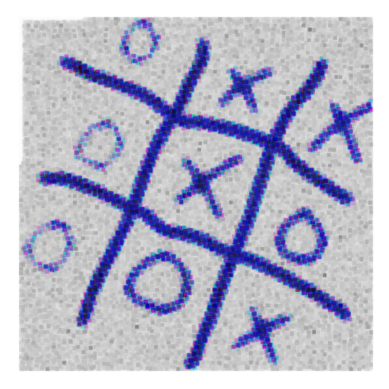

In [10]:
kernel = 3
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

erode_d = cv2.erode(imd, element)

plt.figure()
plt.axis("off")
u.show(erode_d)


### Filtre médian

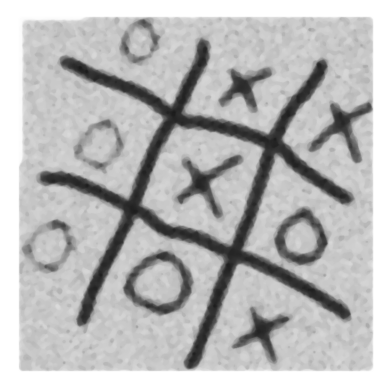

In [11]:
gray_d = cv2.cvtColor(erode_d, cv2.COLOR_BGR2GRAY)

median_d = cv2.medianBlur(gray_d, 11)

plt.figure()
plt.axis("off")
u.show(median_d)


### Canny

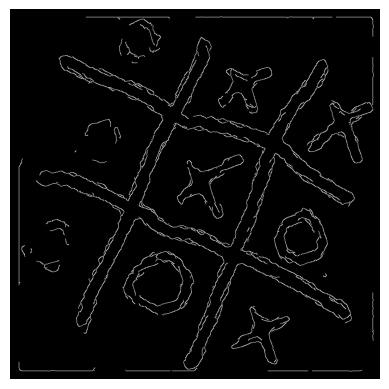

In [12]:

canny_d = cv2.Canny(median_d, 100, 200)

plt.figure()
plt.axis("off")
u.show(canny_d)


### Reconnaissance de la grille et des intersections

#### Transformée de Hough

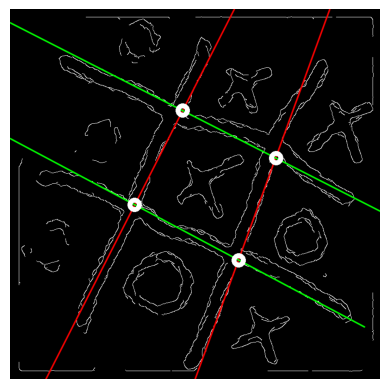

In [13]:
lines_d, corners_d = u.locate_grid(canny_d, gray_d)

plt.figure()
plt.axis("off")
u.show(lines_d)


#### Rotation de la grille

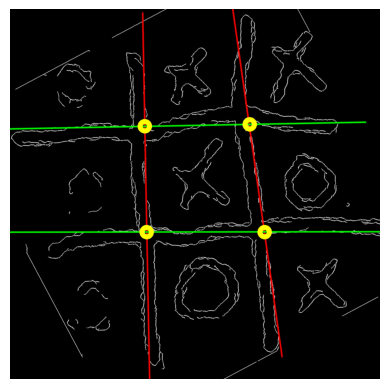

In [14]:

rotate_d, corners_t_d, imd_rotate = u.rotate(lines_d, corners_d, imd)

plt.figure()
plt.axis("off")
u.show(rotate_d)


### Découpage des images en neuf zones

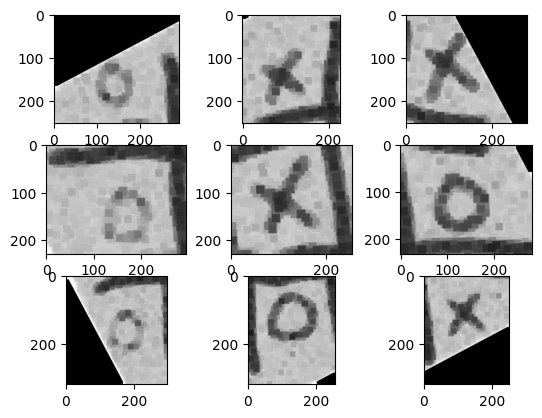

In [15]:

zones_d = u.zoning(corners_t_d, imd_rotate)
paths_d = u.export(zones_d,"imd")